In [1]:
#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools as it
import networkx as nx
import numpy as np
import PyPharmer as phr
import simplejson as json
import os 
from pprint import pprint

In [3]:
json_file1='../Server_Files/ZINCpharmer.json'
json_file2='../Server_Files/pharmit.json'
json_file3='../Server_Files/gold_soln_l2199_3D_H_Ch_m1_4.json'
benchmark='../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json'

In [4]:
bench=phr.Descriptors (input_file=benchmark,select='enabled')

In [5]:
bench.points

array([[  4.   ,  11.971,  60.92 ,  12.054,   1.1  ,   0.   ,   0.   ,   0.   ],
       [  3.   ,  14.852,  55.627,  12.128,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  3.   ,  16.6  ,  51.81 ,  14.798,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  2.   ,  10.961,  60.425,  11.216,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  2.   ,  14.789,  52.612,  15.983,   0.5  ,   0.   ,   0.   ,   0.   ],
       [  1.   ,  11.971,  60.92 ,  12.054,   1.   ,   0.   ,   0.   ,   0.   ],
       [  1.   ,  16.806,  53.618,  12.545,   1.   ,   0.   ,   0.   ,   0.   ],
       [  1.   ,  17.148,  55.406,  10.154,   1.   ,   0.   ,   0.   ,   0.   ]])

In [6]:
len (bench.points)

8

In [7]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

File: None   number or nodes: 8   Number of edges: 28


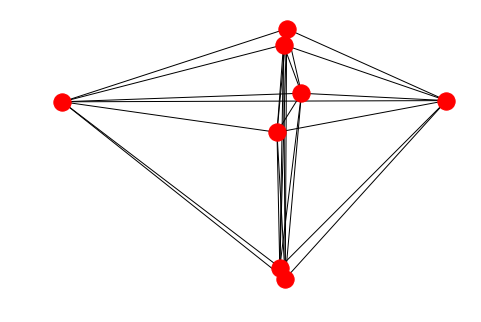

In [8]:
color_code={ 1.0:        [0.100, 1.000, 0.000],\
             2.0:   [1.000, 0.84, 0.000],\
             3.0:      'gray',\
             4.0:           [0.627, 0.1254, 0.941],\
             5.0:        [1.00, 0.00, 0.00],\
             6.0:        [0.00, 0.00, 1.00],\
             7.0:    [0.00, 1.00, 1.00],\
             8.0:              [0.74, 0.74, 0.74],\
             9.0:[1.0, 1.0, 0.0],\
             10.0:       [1.0, 1.0, 0.0] \
             }
data=phr.Descriptors (input_file=benchmark,select='enabled')
G= nx.Graph (pharmacophore='descriptors')
for i in range (len(data.points)):
    file=data.json_object
    node=totuple(data.points[i])
    G.add_node (node_for_adding=node, name=node[0])
    color=color_code[node[0]]
    result=list(it.combinations(G.nodes,2))
    for j in list(result):
        G.add_edge (j[0],j[1])
nx.draw (G,pos=nx.spectral_layout(G)) #node_color=color_code[G.nodes[node]['name']])        
print ('File:',file,' ','number or nodes:',G.number_of_nodes(),' ','Number of edges:',G.number_of_edges ())

opening multiple files form benchmark folder to analyze clique clustering

In [9]:
BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
pprint (ligands)

['../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json']


File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json   number or nodes: 8   Number of edges: 28
number of cliques: 8
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json   number or nodes: 8   Number of edges: 28
number of cliques: 8
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json   number or nodes: 8   Number of edges: 28
number of cliques: 8
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json   number or nodes: 9   Number of edges: 36
number of cliques: 9
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json   number or nodes: 9   Number of edges: 36
number of cliques: 9
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json   number or nodes: 8   Number of edges: 28
number of cliques: 8


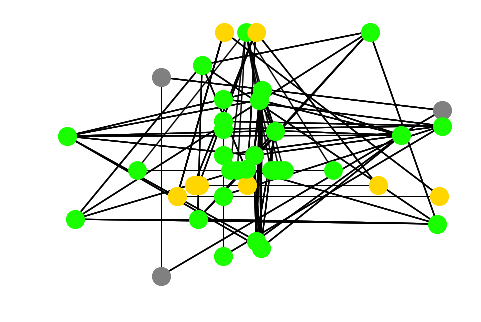

In [42]:
color_code={ 1.0:        [0.100, 1.000, 0.000],\
             2.0:   [1.000, 0.84, 0.000],\
             3.0:      'gray',\
             4.0:           [0.627, 0.1254, 0.941],\
             5.0:        [1.00, 0.00, 0.00],\
             6.0:        [0.00, 0.00, 1.00],\
             7.0:    [0.00, 1.00, 1.00],\
             8.0:              [0.74, 0.74, 0.74],\
             9.0:[1.0, 1.0, 0.0],\
             10.0:       [1.0, 1.0, 0.0] \
             }

for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
    G= nx.Graph (pharmacophore='descriptors')
    for i in range (len(data.points)):
        node=totuple(data.points[i])
        G.add_node (node_for_adding=node)
        #color=color_code[G.nodes[node]['name']]
        color=color_code[node[0]]
        result=list(it.combinations(G.nodes,2))
        for j in list(result):
            G.add_edge (j[0],j[1])
        nx.draw(G,pos=nx.spectral_layout(G),node_color=color, hold=False)
    print ('File:',file,' ','number or nodes:',G.number_of_nodes(),' ','Number of edges:',G.number_of_edges ())
    clique_nodes=nx.cliques_containing_node (G)
    print ('number of cliques:',nx.graph_clique_number (G))

In [32]:
nx.graph_clique_number (G)

8

In [ ]:
nx.draw (f)